In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', 500)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

import gc
# Any results you write to the current directory are saved as output.

['20190727-fe', 'competitive-data-science-predict-future-sales']


In [2]:
train = pd.read_csv('../input/competitive-data-science-predict-future-sales/sales_train.csv')
grouped = train.groupby(['date_block_num','shop_id','item_id'])['item_cnt_day'].sum().to_frame().reset_index().rename(columns = {'item_cnt_day' : 'item_cnt_month'})
grouped.head(3)

del train

In [3]:
my_data_path = '../input/20190727-fe/'
df = pd.read_csv(my_data_path + 'df.csv')
df.head(3)

,date_block_num,item_id,shop_id,revenue_sum,revenue_mean,revenue_std,revenue_nunique,revenue_median,item_price_sum,item_price_mean,item_price_std,item_price_nunique,item_price_median,date_block_weekday_0_sum,date_block_weekday_0_mean,date_block_weekday_1_sum,date_block_weekday_1_mean,date_block_weekday_2_sum,date_block_weekday_2_mean,date_block_weekday_3_sum,date_block_weekday_3_mean,date_block_weekday_4_sum,date_block_weekday_4_mean,date_block_weekday_5_sum,date_block_weekday_5_mean,date_block_weekday_6_sum,date_block_weekday_6_mean,block_shop_weekday_0_sum,block_shop_weekday_0_mean,block_shop_weekday_0_var,block_shop_weekday_1_sum,block_shop_weekday_1_mean,block_shop_weekday_1_var,block_shop_weekday_2_sum,block_shop_weekday_2_mean,block_shop_weekday_2_var,block_shop_weekday_3_sum,block_shop_weekday_3_mean,block_shop_weekday_3_var,block_shop_weekday_4_sum,block_shop_weekday_4_mean,block_shop_weekday_4_var,block_shop_weekday_5_sum,block_shop_weekday_5_mean,block_shop_weekday_5_var,block_shop_weekday_6_sum,block_shop_weekday_6_mean,block_shop_weekday_6_var,block_shop_itemweekday_0_sum,block_shop_itemweekday_0_mean,block_shop_itemweekday_0_var,block_shop_itemweekday_1_sum,block_shop_itemweekday_1_mean,block_shop_itemweekday_1_var,block_shop_itemweekday_2_sum,block_shop_itemweekday_2_mean,block_shop_itemweekday_2_var,block_shop_itemweekday_3_sum,block_shop_itemweekday_3_mean,block_shop_itemweekday_3_var,block_shop_itemweekday_4_sum,block_shop_itemweekday_4_mean,block_shop_itemweekday_4_var,block_shop_itemweekday_5_sum,block_shop_itemweekday_5_mean,block_shop_itemweekday_5_var,block_shop_itemweekday_6_sum,block_shop_itemweekday_6_mean,block_shop_itemweekday_6_var
0,0,32,0,3536.0,321.454545,115.413486,2.0,221.0,2431.0,221.0,0.0,1.0,221.0,11867.0,0.102576,13813.0,0.119397,17557.0,0.151759,17557.0,0.151759,15953.0,0.137894,20837.0,0.180111,18106.0,0.156504,603.0,0.125808,0.110004,643.0,0.134154,0.116181,536.0,0.11183,0.099345,763.0,0.15919,0.133877,733.0,0.152931,0.12957,870.0,0.181515,0.148598,645.0,0.134571,0.116486,1.0,0.250000,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.500000,0.333333,1.0,0.25,0.25,0.0,0.0,0.0,0.0,0.0,0.0
1,0,33,0,2082.0,347.000000,0.000000,1.0,347.0,2082.0,347.0,0.0,1.0,347.0,11867.0,0.102576,13813.0,0.119397,17557.0,0.151759,17557.0,0.151759,15953.0,0.137894,20837.0,0.180111,18106.0,0.156504,603.0,0.125808,0.110004,643.0,0.134154,0.116181,536.0,0.11183,0.099345,763.0,0.15919,0.133877,733.0,0.152931,0.12957,870.0,0.181515,0.148598,645.0,0.134571,0.116486,1.0,0.333333,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.666667,0.333333,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
2,0,35,0,3705.0,308.750000,111.709953,2.0,247.0,2964.0,247.0,0.0,1.0,247.0,11867.0,0.102576,13813.0,0.119397,17557.0,0.151759,17557.0,0.151759,15953.0,0.137894,20837.0,0.180111,18106.0,0.156504,603.0,0.125808,0.110004,643.0,0.134154,0.116181,536.0,0.11183,0.099345,763.0,0.15919,0.133877,733.0,0.152931,0.12957,870.0,0.181515,0.148598,645.0,0.134571,0.116486,0.0,0.000000,NaN,0.0,0.0,NaN,0.0,0.0,NaN,1.0,1.000000,NaN,0.0,0.00,NaN,0.0,0.0,NaN,0.0,0.0,NaN


In [4]:
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

# Month Features

In [5]:
df['month'] = df['date_block_num'] % 12

days = pd.Series([31,28,31,30,31,30,31,31,30,31,30,31])
df['days'] = df['month'].map(days).astype(np.int8)

In [6]:
df = pd.merge(df, grouped, how = 'left')
df = reduce_mem_usage(df)
df.head(3)

Memory usage of dataframe is 1003.32 MB
Memory usage after optimization is: 281.69 MB
Decreased by 71.9%


,date_block_num,item_id,shop_id,revenue_sum,revenue_mean,revenue_std,revenue_nunique,revenue_median,item_price_sum,item_price_mean,item_price_std,item_price_nunique,item_price_median,date_block_weekday_0_sum,date_block_weekday_0_mean,date_block_weekday_1_sum,date_block_weekday_1_mean,date_block_weekday_2_sum,date_block_weekday_2_mean,date_block_weekday_3_sum,date_block_weekday_3_mean,date_block_weekday_4_sum,date_block_weekday_4_mean,date_block_weekday_5_sum,date_block_weekday_5_mean,date_block_weekday_6_sum,date_block_weekday_6_mean,block_shop_weekday_0_sum,block_shop_weekday_0_mean,block_shop_weekday_0_var,block_shop_weekday_1_sum,block_shop_weekday_1_mean,block_shop_weekday_1_var,block_shop_weekday_2_sum,block_shop_weekday_2_mean,block_shop_weekday_2_var,block_shop_weekday_3_sum,block_shop_weekday_3_mean,block_shop_weekday_3_var,block_shop_weekday_4_sum,block_shop_weekday_4_mean,block_shop_weekday_4_var,block_shop_weekday_5_sum,block_shop_weekday_5_mean,block_shop_weekday_5_var,block_shop_weekday_6_sum,block_shop_weekday_6_mean,block_shop_weekday_6_var,block_shop_itemweekday_0_sum,block_shop_itemweekday_0_mean,block_shop_itemweekday_0_var,block_shop_itemweekday_1_sum,block_shop_itemweekday_1_mean,block_shop_itemweekday_1_var,block_shop_itemweekday_2_sum,block_shop_itemweekday_2_mean,block_shop_itemweekday_2_var,block_shop_itemweekday_3_sum,block_shop_itemweekday_3_mean,block_shop_itemweekday_3_var,block_shop_itemweekday_4_sum,block_shop_itemweekday_4_mean,block_shop_itemweekday_4_var,block_shop_itemweekday_5_sum,block_shop_itemweekday_5_mean,block_shop_itemweekday_5_var,block_shop_itemweekday_6_sum,block_shop_itemweekday_6_mean,block_shop_itemweekday_6_var,month,days,item_cnt_month
0,0,32,0,3536.0,321.454559,115.413483,2.0,221.0,2431.0,221.0,0.0,1.0,221.0,11864.0,0.1026,13816.0,0.119385,17552.0,0.151733,17552.0,0.151733,15952.0,0.137939,20832.0,0.180054,18112.0,0.156494,603.0,0.125854,0.109985,643.0,0.134155,0.116211,536.0,0.111816,0.099365,763.0,0.15918,0.133911,733.0,0.152954,0.129517,870.0,0.181519,0.14856,645.0,0.134521,0.116516,1.0,0.250000,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.500000,0.333252,1.0,0.25,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0,31,6.0
1,0,33,0,2082.0,347.000000,0.000000,1.0,347.0,2082.0,347.0,0.0,1.0,347.0,11864.0,0.1026,13816.0,0.119385,17552.0,0.151733,17552.0,0.151733,15952.0,0.137939,20832.0,0.180054,18112.0,0.156494,603.0,0.125854,0.109985,643.0,0.134155,0.116211,536.0,0.111816,0.099365,763.0,0.15918,0.133911,733.0,0.152954,0.129517,870.0,0.181519,0.14856,645.0,0.134521,0.116516,1.0,0.333252,0.333252,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.666504,0.333252,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,31,3.0
2,0,35,0,3705.0,308.750000,111.709953,2.0,247.0,2964.0,247.0,0.0,1.0,247.0,11864.0,0.1026,13816.0,0.119385,17552.0,0.151733,17552.0,0.151733,15952.0,0.137939,20832.0,0.180054,18112.0,0.156494,603.0,0.125854,0.109985,643.0,0.134155,0.116211,536.0,0.111816,0.099365,763.0,0.15918,0.133911,733.0,0.152954,0.129517,870.0,0.181519,0.14856,645.0,0.134521,0.116516,0.0,0.000000,NaN,0.0,0.0,NaN,0.0,0.0,NaN,1.0,1.000000,NaN,0.0,0.00,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0,31,1.0


# Lag Features

In [7]:
def lag_feature(dfdf, lags, col) :
    tmp = dfdf
    
    for i in lags :
        shifted = tmp.copy()
        shifted.columns = ['date_block_num','shop_id','item_id', col+'_lag_'+str(i)]
        shifted['date_block_num'] += i
        dfdf = pd.merge(dfdf, shifted, on = ['date_block_num','shop_id','item_id'], how = 'left')
        
    return dfdf

In [8]:
aa = lag_feature(df[['date_block_num','shop_id','item_id','item_cnt_month']], [1,2,3,6,12], 'item_cnt_month')
aa.fillna(0, inplace = True)
aa.head(3)

,date_block_num,shop_id,item_id,item_cnt_month,item_cnt_month_lag_1,item_cnt_month_lag_2,item_cnt_month_lag_3,item_cnt_month_lag_6,item_cnt_month_lag_12
0,0,0,32,6.0,0.0,0.0,0.0,0.0,0.0
1,0,0,33,3.0,0.0,0.0,0.0,0.0,0.0
2,0,0,35,1.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df = pd.concat([df, aa.drop(['date_block_num', 'shop_id', 'item_id', 'item_cnt_month'], axis = 1)], axis = 1)
df.shape

(1823324, 77)

In [10]:
df.to_csv('20190729_df.csv', index = False)

# Modeling

In [11]:
print ('there are no duplicated columns!') if len(df.columns) == len(set(df.columns)) else('중복 칼럼이 있음')

there are no duplicated columns!


In [12]:
y = df['item_cnt_month']
df.drop('item_cnt_month', axis = 1, inplace = True)

X_train = df[df.date_block_num < 30]
y_train = y[df[df.date_block_num < 30].index]
X_valid = df[(df.date_block_num >= 30) & (df.date_block_num < 34)]
y_valid = y[df[(df.date_block_num >= 30) & (df.date_block_num < 34)].index]

X_test = df[df.date_block_num == 34] #test data

print('train shape X : {} y : {}'.format(X_train.shape, y_train.shape))
print('valid shape X : {} y : {}'.format(X_valid.shape, y_valid.shape))
print('test shape X : {}'.format(X_test.shape))

train shape X : (1480902, 76) y : (1480902,)
valid shape X : (128222, 76) y : (128222,)
test shape X : (214200, 76)


In [13]:
import gc
del df
gc.collect()

57

# Modeling

## LightGBM

In [14]:
from lightgbm import LGBMRegressor
lgb = LGBMRegressor(n_jobs = -1, n_estimators = 1000)

lgb.fit(X_train, y_train, eval_metric='rmse', eval_set=[(X_train, y_train), (X_valid, y_valid)],
       verbose = 20, early_stopping_rounds=30)

Training until validation scores don't improve for 30 rounds.
[20]	training's l2: 11.3365	training's rmse: 3.36697	valid_1's l2: 91.0059	valid_1's rmse: 9.5397
[40]	training's l2: 7.29967	training's rmse: 2.70179	valid_1's l2: 85.6413	valid_1's rmse: 9.25426
[60]	training's l2: 6.00116	training's rmse: 2.44973	valid_1's l2: 82.3438	valid_1's rmse: 9.07435
[80]	training's l2: 5.24441	training's rmse: 2.29007	valid_1's l2: 80.0218	valid_1's rmse: 8.94549
[100]	training's l2: 4.58697	training's rmse: 2.14172	valid_1's l2: 77.8658	valid_1's rmse: 8.82416
[120]	training's l2: 4.15005	training's rmse: 2.03717	valid_1's l2: 77.1991	valid_1's rmse: 8.7863
[140]	training's l2: 3.75487	training's rmse: 1.93775	valid_1's l2: 77.2984	valid_1's rmse: 8.79195
[160]	training's l2: 3.42149	training's rmse: 1.84973	valid_1's l2: 76.3382	valid_1's rmse: 8.73717
[180]	training's l2: 3.16852	training's rmse: 1.78003	valid_1's l2: 75.8053	valid_1's rmse: 8.70663
[200]	training's l2: 2.91077	training's rmse

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=1000, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

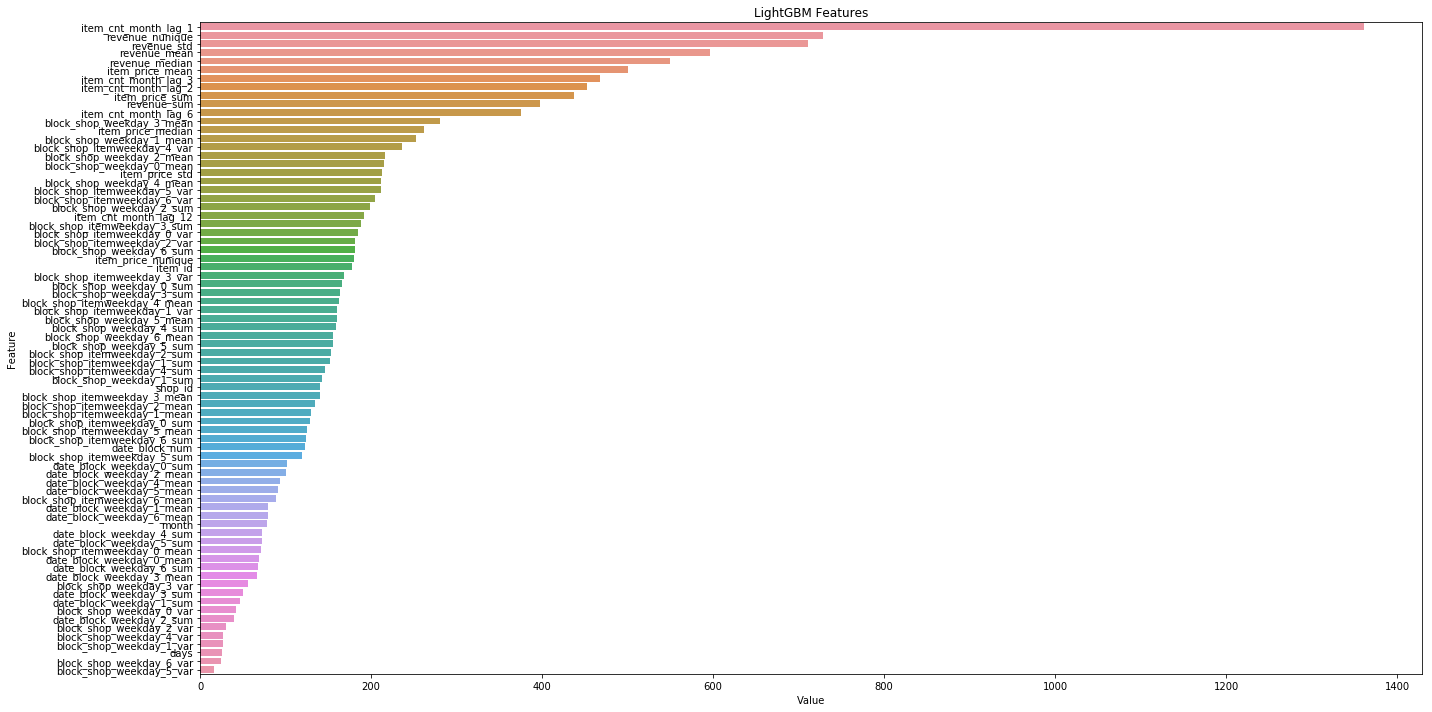

In [16]:
feature_imp = pd.DataFrame(sorted(zip(lgb.feature_importances_, X_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

## XGBoost

In [17]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_jobs = -1, n_estimators = 1000)

In [18]:
xgb.fit(X_train, y_train ,eval_metric='rmse', eval_set=[(X_train, y_train), (X_valid, y_valid)],
         verbose = 20, early_stopping_rounds=30)

/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:24:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:7.98764	validation_1-rmse:11.8795
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 30 rounds.
[20]	validation_0-rmse:4.40164	validation_1-rmse:9.81627
[40]	validation_0-rmse:3.76666	validation_1-rmse:9.18327
[60]	validation_0-rmse:3.47109	validation_1-rmse:8.98025
[80]	validation_0-rmse:3.26862	validation_1-rmse:8.77797
[100]	validation_0-rmse:3.10321	validation_1-rmse:8.65681
[120]	validation_0-rmse:2.96751	validation_1-rmse:8.50104
[140]	validation_0-rmse:2.87199	validation_1-rmse:8.38115
[160]	validation_0-rmse:2.79745	validation_1-rmse:8.3424
[180]	validation_0-rmse:2.73008	validation_1-rmse:8.31946
[200]	validation_0-rmse:2.65303	validation_1-rmse:8.271
[220]	validation_0-rmse:2.59409	validation_1-rmse:8.26126
[240]	validation_0-rmse:2.5

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

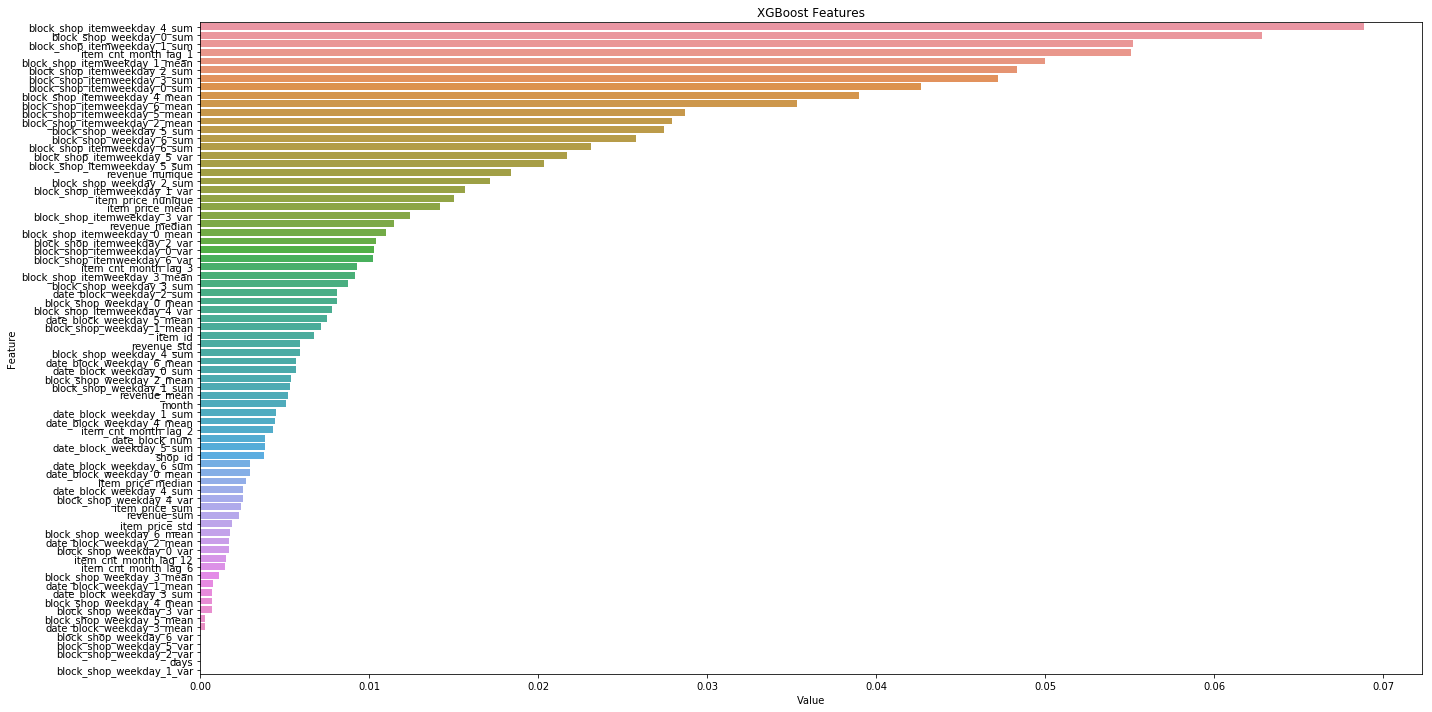

In [19]:
feature_imp = pd.DataFrame(sorted(zip(xgb.feature_importances_, X_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('XGBoost Features')
plt.tight_layout()
plt.show()

# Submission

In [20]:
y_pred_lgb = lgb.predict(X_test).clip(0,20)
y_pred_xgb = xgb.predict(X_test).clip(0,20)

In [21]:
test = pd.read_csv('../input/competitive-data-science-predict-future-sales/test.csv')
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [22]:
sub1 = pd.DataFrame({
    'ID' : test.index,
    'item_cnt_month' : y_pred_lgb
})

sub2 = pd.DataFrame({
    'ID' : test.index,
    'item_cnt_month' : y_pred_xgb
})

sub1.to_csv('20190729_lgb_FE_pred.csv', index = False)
sub2.to_csv('20190729_xgb_Fe_pred.csv', index = False)